In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import h5py
import keras
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential, Model
from keras.optimizers import SGD, RMSprop, Adam, Nadam
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, LSTM
from keras.layers import Activation, Flatten, Input, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D 
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D

In [54]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
# Open the file as readonly. The file should be present inside a directory called "data" in the same folder as code
h5f = h5py.File('/gdrive/My Drive/SVHN_single_grey1.h5', 'r')

In [0]:
x_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
x_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
x_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

In [58]:
#Importing opencv module for the resizing function
import cv2

#Create a resized dataset for training and testing inputs with corresponding size. Here we are resizing it to 28X28 (same input size as MNIST)
x_train_res = np.zeros((x_train.shape[0],28,28), dtype=np.float32)
for i in range(x_train.shape[0]):
  #using cv2.resize to resize each train example to 28X28 size using Cubic interpolation
  x_train_res[i,:,:] = cv2.resize(x_train[i], dsize=(28, 28), interpolation=cv2.INTER_CUBIC)

x_test_res = np.zeros((x_test.shape[0],28,28), dtype=np.float32)
for i in range(x_test.shape[0]):
  #using cv2.resize to resize each test example to 28X28 size using Cubic interpolation
  x_test_res[i,:,:] = cv2.resize(x_test[i], dsize=(28, 28), interpolation=cv2.INTER_CUBIC)

x_val_res = np.zeros((x_val.shape[0],28,28), dtype=np.float32)
for i in range(x_test.shape[0]):
  #using cv2.resize to resize each test example to 28X28 size using Cubic interpolation
  x_val_res[i,:,:] = cv2.resize(x_val[i], dsize=(28, 28), interpolation=cv2.INTER_CUBIC)  
  
#We don't need the original dataset anynmore so we can clear up memory consumed by original dataset
del x_train
del x_test
del x_val

print(x_train_res.shape)
print(x_test_res.shape)
print(x_val_res.shape)

# input image dimensions
img_rows, img_cols = 28, 28

#Keras expects data to be in the format (N_E.N_H,N_W,N_C)  N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.
x_train = x_train_res.reshape(x_train_res.shape[0], img_rows, img_cols, 1)
x_test = x_test_res.reshape(x_test_res.shape[0], img_rows, img_cols, 1)
x_val = x_val_res.reshape(x_val_res.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

(42000, 28, 28)
(18000, 28, 28)
(60000, 28, 28)


In [0]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_val = keras.utils.to_categorical(y_val, 10)

In [0]:
h5f.close()

In [61]:
print('Training set', x_train.shape, y_train.shape)
print('Validation set', x_val.shape, y_val.shape)
print('Test set', x_test.shape, y_test.shape)

Training set (42000, 28, 28, 1) (42000, 10)
Validation set (60000, 28, 28, 1) (60000, 10)
Test set (18000, 28, 28, 1) (18000, 10)


In [0]:
#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,name='conv_1'))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(64, (3, 3), activation='relu',name='conv_2'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))

#Apply Dropout with 0.25 probability 
model.add(Dropout(0.25,name='drop_1'))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu',name='dense_1'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5,name='drop_2'))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(10, activation='softmax',name='dense_2'))

In [0]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])


In [64]:
model.fit(x_train, y_train,
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 127s 3ms/step - loss: 2.8351 - acc: 0.4685 - val_loss: 0.7054 - val_acc: 0.8048
Epoch 2/20
42000/42000 [==============================] - 127s 3ms/step - loss: 0.8698 - acc: 0.7314 - val_loss: 0.5905 - val_acc: 0.8362
Epoch 3/20
42000/42000 [==============================] - 128s 3ms/step - loss: 0.7223 - acc: 0.7795 - val_loss: 0.5055 - val_acc: 0.8566
Epoch 4/20
42000/42000 [==============================] - 128s 3ms/step - loss: 0.6422 - acc: 0.8028 - val_loss: 0.4831 - val_acc: 0.8625
Epoch 5/20
42000/42000 [==============================] - 127s 3ms/step - loss: 0.5749 - acc: 0.8215 - val_loss: 0.4523 - val_acc: 0.8708
Epoch 6/20
42000/42000 [==============================] - 128s 3ms/step - loss: 0.5241 - acc: 0.8379 - val_loss: 0.4209 - val_acc: 0.8811
Epoch 7/20
42000/42000 [==============================] - 127s 3ms/step - 

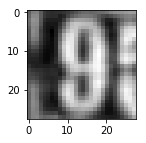

9


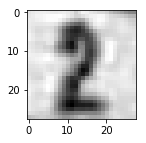

2


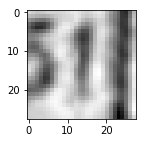

1


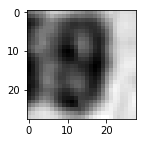

9


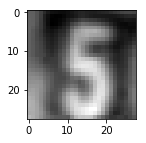

5


In [65]:
plt.figure(figsize=(2,2))
plt.imshow(x_test[3].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[3].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[2].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[2].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[33].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[33].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[59].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[59].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[36].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[36].reshape(1,28,28,1))))